# DATA:
Link: https://archive.ics.uci.edu/ml/datasets/Thoracic+Surgery+Data

- We need to load arff in pandas dataframe using below function.

In [1]:
from scipy.io import arff
import pandas as pd

data = arff.loadarff('ThoraricSurgery.arff')
df = pd.DataFrame(data[0])

df.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,b'DGN2',2.88,2.16,b'PRZ1',b'F',b'F',b'F',b'T',b'T',b'OC14',b'F',b'F',b'F',b'T',b'F',60.0,b'F'
1,b'DGN3',3.40,1.88,b'PRZ0',b'F',b'F',b'F',b'F',b'F',b'OC12',b'F',b'F',b'F',b'T',b'F',51.0,b'F'
2,b'DGN3',2.76,2.08,b'PRZ1',b'F',b'F',b'F',b'T',b'F',b'OC11',b'F',b'F',b'F',b'T',b'F',59.0,b'F'
3,b'DGN3',3.68,3.04,b'PRZ0',b'F',b'F',b'F',b'F',b'F',b'OC11',b'F',b'F',b'F',b'F',b'F',54.0,b'F'
4,b'DGN3',2.44,0.96,b'PRZ2',b'F',b'T',b'F',b'T',b'T',b'OC11',b'F',b'F',b'F',b'T',b'F',73.0,b'T'


## We need to decode the byte in string values in the multiple columns as below:

In [2]:
def arff_data(df):
  df = df.copy()
  #we need to decode the byte from all the columns
  df['DGN'] = df['DGN'].str.decode('utf-8')
  df['PRE6'] = df['PRE6'].str.decode('utf-8')
  df['PRE7'] = df['PRE7'].str.decode('utf-8')
  df['PRE8'] = df['PRE8'].str.decode('utf-8')
  df['PRE9'] = df['PRE9'].str.decode('utf-8')
  df['PRE10'] = df['PRE10'].str.decode('utf-8')
  df['PRE11'] = df['PRE11'].str.decode('utf-8')
  df['PRE14'] = df['PRE14'].str.decode('utf-8')
  df['PRE17'] = df['PRE17'].str.decode('utf-8')
  df['PRE19'] = df['PRE19'].str.decode('utf-8')
  df['PRE25'] = df['PRE25'].str.decode('utf-8')
  df['PRE30'] = df['PRE30'].str.decode('utf-8')
  df['PRE32'] = df['PRE32'].str.decode('utf-8')
  df['Risk1Yr'] = df['Risk1Yr'].str.decode('utf-8')
  

  return df

In [3]:
X = arff_data(df)

In [4]:
X

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60.0,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51.0,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59.0,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54.0,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73.0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63.0,F
466,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61.0,F
467,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52.0,F
468,DGN3,1.96,1.68,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,79.0,F


# EDA

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DGN      470 non-null    object 
 1   PRE4     470 non-null    float64
 2   PRE5     470 non-null    float64
 3   PRE6     470 non-null    object 
 4   PRE7     470 non-null    object 
 5   PRE8     470 non-null    object 
 6   PRE9     470 non-null    object 
 7   PRE10    470 non-null    object 
 8   PRE11    470 non-null    object 
 9   PRE14    470 non-null    object 
 10  PRE17    470 non-null    object 
 11  PRE19    470 non-null    object 
 12  PRE25    470 non-null    object 
 13  PRE30    470 non-null    object 
 14  PRE32    470 non-null    object 
 15  AGE      470 non-null    float64
 16  Risk1Yr  470 non-null    object 
dtypes: float64(3), object(14)
memory usage: 62.5+ KB


In [6]:
# check missing value
X.isna().sum()

DGN        0
PRE4       0
PRE5       0
PRE6       0
PRE7       0
PRE8       0
PRE9       0
PRE10      0
PRE11      0
PRE14      0
PRE17      0
PRE19      0
PRE25      0
PRE30      0
PRE32      0
AGE        0
Risk1Yr    0
dtype: int64

## No missing value.

In [7]:
# find the correlation between the columns (numerical)
X.corr()

,PRE4,PRE5,AGE
PRE4,1.000000,0.032975,-0.290178
PRE5,0.032975,1.000000,-0.115900
AGE,-0.290178,-0.115900,1.000000


In [8]:
X['Risk1Yr'].value_counts()

F    400
T     70
Name: Risk1Yr, dtype: int64

# Class Imbalance problem.

In [9]:
X['DGN'].unique()

array(['DGN2', 'DGN3', 'DGN4', 'DGN8', 'DGN5', 'DGN6', 'DGN1'],
      dtype=object)

In [10]:
X['PRE6'].unique()

array(['PRZ1', 'PRZ0', 'PRZ2'], dtype=object)

In [11]:
X['PRE14'].unique()

array(['OC14', 'OC12', 'OC11', 'OC13'], dtype=object)

## One hot encoding needed for below columns:
- DGN
- PRE6
- PRE14

# Narrative:
- Features: all apart from the last column
- Target: Risk1Yr

# We will do all the 3 ways:
- Individual implementation
- Sklearn's Pipeline
- PyCaret


# Individual Implementation 
- Logistic Regression
- RandomForest Classifier
- DecisionTree Classifier

### Tree based models don't require scaled data so we are not going to use StandardScaler for tree-based models.

## We will use scaled data for linear models like Logistic Regression.
mean of 0 and variance of 1.

In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import matthews_corrcoef, plot_confusion_matrix, classification_report

In [13]:
X.columns

Index(['DGN', 'PRE4', 'PRE5', 'PRE6', 'PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11',
       'PRE14', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'AGE', 'Risk1Yr'],
      dtype='object')

In [14]:
def preprocess_inputs(df):
  df = df.copy()

  #making columns name to lower case
  df.rename(columns={'DGN': 'dgn',
                     'PRE4': 'pre4',
                     'PRE5': 'pre5',
                     'PRE6': 'pre6',
                     'PRE7': 'pre7',
                     'PRE8': 'pre8',
                     'PRE9': 'pre9',
                     'PRE10': 'pre10',
                     'PRE11': 'pre11',
                     'PRE14': 'pre14',
                     'PRE17': 'pre17',
                     'PRE19': 'pre19',
                     'PRE25': 'pre25',
                     'PRE30': 'pre30',
                     'PRE32': 'pre32',
                     'AGE': 'age',
                     'Risk1Yr': 'label'}, inplace = True)
  
  #converting boolean columns with 1 and 0 (1 for T and 0 for F)
  df['pre7'] = df['pre7'].apply(lambda x: 1  if x == 'T' else 0)
  df['pre8'] = df['pre8'].apply(lambda x:1 if x == 'T' else 0)
  df['pre9'] = df['pre9'].apply(lambda x:1 if x == 'T' else 0)
  df['pre10'] = df['pre10'].apply(lambda x:1 if x == 'T' else 0)
  df['pre11'] = df['pre11'].apply(lambda x:1 if x== 'T' else 0)
  df['pre17'] = df['pre17'].apply(lambda x:1 if x == 'T' else 0)
  df['pre19'] = df['pre19'].apply(lambda x:1 if x == 'T' else 0)
  df['pre25'] = df['pre25'].apply(lambda x:1 if x == 'T' else 0)
  df['pre30'] = df['pre30'].apply(lambda x:1 if x== 'T' else 0)
  df['pre32'] = df['pre32'].apply(lambda x:1 if x== 'T' else 0)
  df['label'] = df['label'].apply(lambda x:1 if x == 'T' else 0)

  #one hot encode
  dgn_dummies = pd.get_dummies(df['dgn'])
  df = pd.concat([df, dgn_dummies], axis=1)
  pre6_dummies = pd.get_dummies(df['pre6'])
  df = pd.concat([df, pre6_dummies], axis=1)
  pre14_dummies = pd.get_dummies(df['pre14'])
  df = pd.concat([df, pre14_dummies], axis=1)
  df = df.drop(['dgn', 'pre6', 'pre14'], axis=1)

  # features and label
  feat = df.drop("label", axis=1)
  target = df['label']

  #split
  X_train, X_test, y_train, y_test = train_test_split(feat, target, train_size= 0.7, shuffle=True, random_state=1)

  #scale the data for Logistic Regression
  scaler = StandardScaler()
  X_train = pd.DataFrame(scaler.fit_transform(X_train), index = X_train.index, columns= X_train.columns)

  return X_train, X_test, y_train, y_test

In [15]:
 X_train, X_test, y_train, y_test = preprocess_inputs(X)

In [16]:
X_train

,pre4,pre5,pre7,pre8,pre9,pre10,pre11,pre17,pre19,pre25,pre30,pre32,age,DGN1,DGN2,DGN3,DGN4,DGN5,DGN6,DGN8,PRZ0,PRZ1,PRZ2,OC11,OC12,OC13,OC14
409,-0.722847,-0.221624,-0.292931,-0.423334,-0.286770,-1.420686,-0.457776,-0.286770,-0.055216,-0.147442,0.486664,-0.078206,-0.421369,0.0,-0.339491,0.571501,-0.333896,-0.177054,-0.078206,-0.078206,1.546529,-1.346093,-0.254411,1.245146,-1.079108,-0.194563,-0.185987
318,-1.003003,-0.236360,-0.292931,-0.423334,-0.286770,0.703885,-0.457776,-0.286770,-0.055216,-0.147442,0.486664,-0.078206,0.146788,0.0,-0.339491,0.571501,-0.333896,-0.177054,-0.078206,-0.078206,-0.646609,0.742891,-0.254411,1.245146,-1.079108,-0.194563,-0.185987
186,0.070926,-0.221624,-0.292931,-0.423334,-0.286770,0.703885,-0.457776,-0.286770,-0.055216,-0.147442,0.486664,-0.078206,0.146788,0.0,-0.339491,0.571501,-0.333896,-0.177054,-0.078206,-0.078206,-0.646609,0.742891,-0.254411,1.245146,-1.079108,-0.194563,-0.185987
379,-0.629462,-0.230155,-0.292931,-0.423334,-0.286770,0.703885,-0.457776,-0.286770,-0.055216,-0.147442,0.486664,-0.078206,1.396734,0.0,-0.339491,-1.749780,2.994945,-0.177054,-0.078206,-0.078206,-0.646609,0.742891,-0.254411,1.245146,-1.079108,-0.194563,-0.185987
98,-0.734520,4.831100,-0.292931,-0.423334,3.487119,0.703885,-0.457776,-0.286770,-0.055216,-0.147442,0.486664,-0.078206,-0.989526,0.0,-0.339491,0.571501,-0.333896,-0.177054,-0.078206,-0.078206,-0.646609,0.742891,-0.254411,1.245146,-1.079108,-0.194563,-0.185987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.537851,5.684208,3.413773,-0.423334,-0.286770,0.703885,-0.457776,-0.286770,-0.055216,-0.147442,0.486664,-0.078206,-2.125840,0.0,-0.339491,0.571501,-0.333896,-0.177054,-0.078206,-0.078206,1.546529,-1.346093,-0.254411,-0.803119,0.926691,-0.194563,-0.185987
72,0.304389,-0.161907,-0.292931,-0.423334,-0.286770,-1.420686,-0.457776,-0.286770,-0.055216,-0.147442,0.486664,-0.078206,0.033157,0.0,-0.339491,0.571501,-0.333896,-0.177054,-0.078206,-0.078206,1.546529,-1.346093,-0.254411,1.245146,-1.079108,-0.194563,-0.185987
396,-0.582770,-0.227053,-0.292931,-0.423334,-0.286770,-1.420686,-0.457776,-0.286770,-0.055216,-0.147442,-2.054805,-0.078206,-4.739362,0.0,-0.339491,0.571501,-0.333896,-0.177054,-0.078206,-0.078206,1.546529,-1.346093,-0.254411,-0.803119,0.926691,-0.194563,-0.185987
235,1.051469,-0.106067,-0.292931,-0.423334,-0.286770,0.703885,-0.457776,-0.286770,-0.055216,-0.147442,0.486664,-0.078206,-0.080475,0.0,-0.339491,0.571501,-0.333896,-0.177054,-0.078206,-0.078206,-0.646609,0.742891,-0.254411,-0.803119,0.926691,-0.194563,-0.185987


In [17]:
y_train

409    0
318    0
186    0
379    0
98     0
      ..
255    0
72     0
396    0
235    0
37     0
Name: label, Length: 329, dtype: int64

## Training and Evaluation

In [18]:
log_reg = LogisticRegression()
log_model = log_reg.fit(X_train, y_train)

In [19]:
y_pred_log = log_model.predict(X_test)
y_pred_log

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

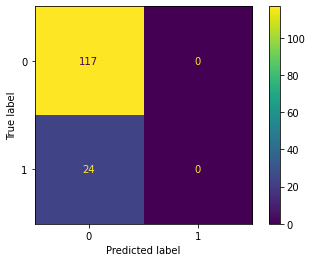

In [20]:
plot_confusion_matrix(log_model, X_test, y_test, labels=log_model.classes_)

In [21]:
clr_log = classification_report(y_test, y_pred_log, labels=log_model.classes_)
print(clr_log)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       117
           1       0.00      0.00      0.00        24

    accuracy                           0.83       141
   macro avg       0.41      0.50      0.45       141
weighted avg       0.69      0.83      0.75       141



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#PyCaret

In [22]:
!pip install pycaret

In [23]:
import pycaret.classification as pcr

In [25]:
def pycaret_inputs(df):
  df = df.copy()

  #making columns name to lower case
  df.rename(columns={'DGN': 'dgn',
                     'PRE4': 'pre4',
                     'PRE5': 'pre5',
                     'PRE6': 'pre6',
                     'PRE7': 'pre7',
                     'PRE8': 'pre8',
                     'PRE9': 'pre9',
                     'PRE10': 'pre10',
                     'PRE11': 'pre11',
                     'PRE14': 'pre14',
                     'PRE17': 'pre17',
                     'PRE19': 'pre19',
                     'PRE25': 'pre25',
                     'PRE30': 'pre30',
                     'PRE32': 'pre32',
                     'AGE': 'age',
                     'Risk1Yr': 'label'}, inplace = True)
  
  #converting boolean columns with 1 and 0 (1 for T and 0 for F)
  df['pre7'] = df['pre7'].apply(lambda x: 1  if x == 'T' else 0)
  df['pre8'] = df['pre8'].apply(lambda x:1 if x == 'T' else 0)
  df['pre9'] = df['pre9'].apply(lambda x:1 if x == 'T' else 0)
  df['pre10'] = df['pre10'].apply(lambda x:1 if x == 'T' else 0)
  df['pre11'] = df['pre11'].apply(lambda x:1 if x== 'T' else 0)
  df['pre17'] = df['pre17'].apply(lambda x:1 if x == 'T' else 0)
  df['pre19'] = df['pre19'].apply(lambda x:1 if x == 'T' else 0)
  df['pre25'] = df['pre25'].apply(lambda x:1 if x == 'T' else 0)
  df['pre30'] = df['pre30'].apply(lambda x:1 if x== 'T' else 0)
  df['pre32'] = df['pre32'].apply(lambda x:1 if x== 'T' else 0)
  df['label'] = df['label'].apply(lambda x:1 if x == 'T' else 0)

 

  return df

In [26]:
pycaret_data = pycaret_inputs(X)

In [27]:
pycaret_data

,dgn,pre4,pre5,pre6,pre7,pre8,pre9,pre10,pre11,pre14,pre17,pre19,pre25,pre30,pre32,age,label
0,DGN2,2.88,2.16,PRZ1,0,0,0,1,1,OC14,0,0,0,1,0,60.0,0
1,DGN3,3.40,1.88,PRZ0,0,0,0,0,0,OC12,0,0,0,1,0,51.0,0
2,DGN3,2.76,2.08,PRZ1,0,0,0,1,0,OC11,0,0,0,1,0,59.0,0
3,DGN3,3.68,3.04,PRZ0,0,0,0,0,0,OC11,0,0,0,0,0,54.0,0
4,DGN3,2.44,0.96,PRZ2,0,1,0,1,1,OC11,0,0,0,1,0,73.0,1
5,DGN3,2.48,1.88,PRZ1,0,0,0,1,0,OC11,0,0,0,0,0,51.0,0
6,DGN3,4.36,3.28,PRZ1,0,0,0,1,0,OC12,1,0,0,1,0,59.0,1
7,DGN2,3.19,2.50,PRZ1,0,0,0,1,0,OC11,0,0,1,1,0,66.0,1
8,DGN3,3.16,2.64,PRZ2,0,0,0,1,1,OC11,0,0,0,1,0,68.0,0
9,DGN3,2.32,2.16,PRZ1,0,0,0,1,0,OC11,0,0,0,1,0,54.0,0


In [28]:
pcr.setup(
    data = pycaret_data,
    target = 'label',
    train_size = 0.7,
    normalize = True
)

,Description,Value
0,session_id,327
1,Target,label
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(470, 17)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,13
8,Ordinal Features,False
9,High Cardinality Features,False


([],
 False,
 'clf-default-name',
 False,
 {'Bagging': <pycaret.containers.models.classification.BaggingClassifierContainer at 0x7fc606dc7610>,
  'CalibratedCV': <pycaret.containers.models.classification.CalibratedClassifierCVContainer at 0x7fc606dc78d0>,
  'Stacking': <pycaret.containers.models.classification.StackingClassifierContainer at 0x7fc606e0cb10>,
  'Voting': <pycaret.containers.models.classification.VotingClassifierContainer at 0x7fc606dc7e10>,
  'ada': <pycaret.containers.models.classification.AdaBoostClassifierContainer at 0x7fc606de7050>,
  'dt': <pycaret.containers.models.classification.DecisionTreeClassifierContainer at 0x7fc606de7fd0>,
  'et': <pycaret.containers.models.classification.ExtraTreesClassifierContainer at 0x7fc606dc7650>,
  'gbc': <pycaret.containers.models.classification.GradientBoostingClassifierContainer at 0x7fc606e110d0>,
  'gpc': <pycaret.containers.models.classification.GaussianProcessClassifierContainer at 0x7fc606de7950>,
  'knn': <pycaret.containe

In [30]:
pcr.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8446,0.6107,0.0200,0.1000,0.0333,0.0244,0.0343,0.459
lr,Logistic Regression,0.8445,0.6340,0.0400,0.1500,0.0619,0.0463,0.0590,0.236
et,Extra Trees Classifier,0.8294,0.6080,0.1600,0.4000,0.2226,0.1485,0.1698,0.441
ridge,Ridge Classifier,0.8293,0.0000,0.0200,0.0500,0.0286,-0.0018,-0.0039,0.017
knn,K Neighbors Classifier,0.8233,0.6050,0.0200,0.0500,0.0286,-0.0133,-0.0201,0.117
ada,Ada Boost Classifier,0.8170,0.5642,0.1200,0.2200,0.1422,0.0748,0.0844,0.081
lda,Linear Discriminant Analysis,0.8110,0.6309,0.0767,0.2833,0.1155,0.0372,0.0608,0.017
lightgbm,Light Gradient Boosting Machine,0.8080,0.5962,0.0200,0.1000,0.0333,-0.0315,-0.0302,0.072
gbc,Gradient Boosting Classifier,0.8049,0.5795,0.0200,0.1000,0.0333,-0.0343,-0.0284,0.075
svm,SVM - Linear Kernel,0.7808,0.0000,0.1567,0.2917,0.1824,0.0789,0.0921,0.015


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=327, verbose=0,
                       warm_start=False)

In [31]:
best_model = pcr.create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8485,0.6893,0.00,0.0,0.0000,0.0000,0.0000
1,0.8485,0.6571,0.00,0.0,0.0000,0.0000,0.0000
2,0.8485,0.4857,0.00,0.0,0.0000,0.0000,0.0000
3,0.8485,0.5536,0.00,0.0,0.0000,0.0000,0.0000
4,0.8485,0.6786,0.00,0.0,0.0000,0.0000,0.0000
5,0.8485,0.5857,0.00,0.0,0.0000,0.0000,0.0000
6,0.8182,0.4179,0.00,0.0,0.0000,-0.0532,-0.0747
7,0.8182,0.6759,0.00,0.0,0.0000,0.0000,0.0000
8,0.8750,0.8259,0.20,1.0,0.3333,0.2967,0.4174
9,0.8438,0.5370,0.00,0.0,0.0000,0.0000,0.0000


In [32]:
pcr.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [33]:
pcr.save_model(best_model, "rf_model")

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='label',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                         max_l